In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

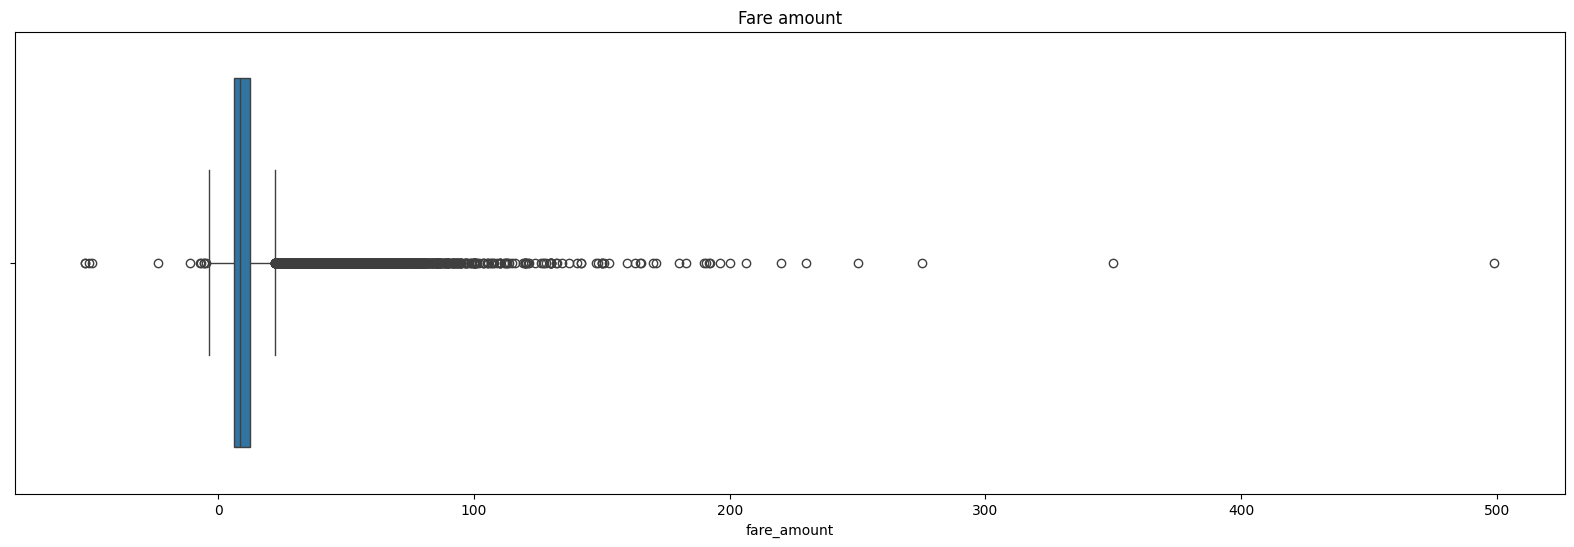

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.boxplot(x=df['fare_amount'])
plt.title('Fare amount')
plt.show()

In [11]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [12]:
outliers = find_outliers(df["fare_amount"])
print("No. of outliers: "+ str(len(outliers)))
print("Max: "+str(outliers.max()))
print("Min: "+str(outliers.min()))

No. of outliers: 17166
Max: 499.0
Min: -52.0


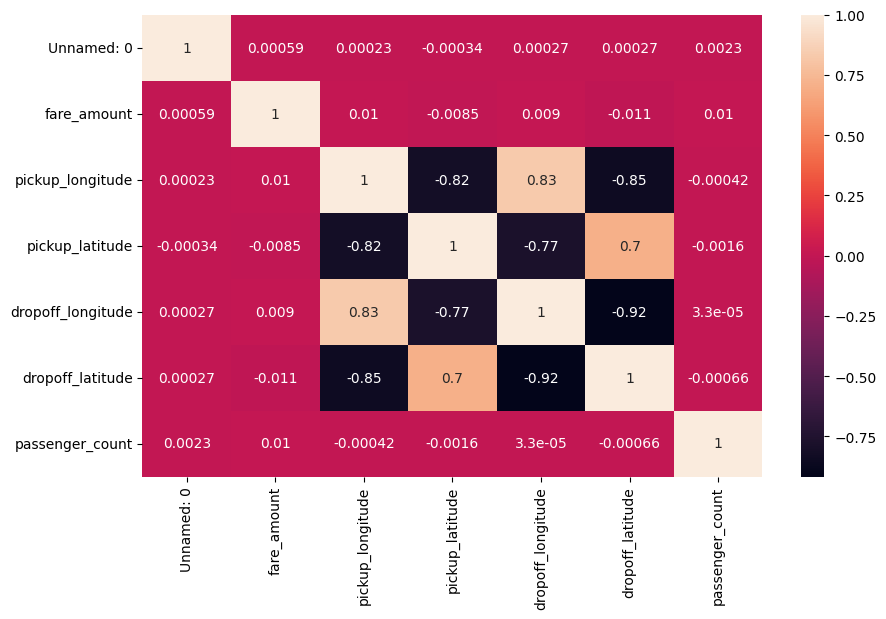

In [15]:
# Drop the 'pickup_datetime' column
corr_data = df.select_dtypes(include=[float, int])
# corr_data = df.drop(['pickup_datetime'], axis=1)

# Plot the heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_data.corr(), annot=True)
plt.show()


In [34]:
print(df.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [44]:
# Drop non-numeric columns that you do not need for the model
df.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True, errors='ignore')


In [58]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'passenger_count', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [62]:
# Attempt to drop the column safely
df.drop(columns='Unnamed:0', inplace=True, errors='ignore')


In [63]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'passenger_count', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
# Step 1: Inspect data types
print(df.dtypes)

# Step 2: Convert any datetime columns to features if necessary
if 'pickup_datetime' in df.columns:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['year'] = df['pickup_datetime'].dt.year
    df['month'] = df['pickup_datetime'].dt.month
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df.drop('pickup_datetime', axis=1, inplace=True)

# Step 3: Drop non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns to drop:", non_numeric_columns)
df.drop(columns=non_numeric_columns, inplace=True, errors='ignore')

# Step 4: Redefine X and y
x = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

# Step 5: Check the data
print(x.head())
print(x.dtypes)

# Step 6: Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Step 8: Make predictions (optional)
predicted_values = model.predict(x_test)
print(predicted_values)


Unnamed: 0           int64
fare_amount        float64
passenger_count      int64
year                 int32
month                int32
day                  int32
hour                 int32
dtype: object
Non-numeric columns to drop: Index([], dtype='object')
   Unnamed: 0  passenger_count  year  month  day  hour
0    24238194                1  2015      5    7    19
1    27835199                1  2009      7   17    20
2    44984355                1  2009      8   24    21
3    25894730                3  2009      6   26     8
4    17610152                5  2014      8   28    17
Unnamed: 0         int64
passenger_count    int64
year               int32
month              int32
day                int32
hour               int32
dtype: object
[11.85254981 10.15226035 12.5624353  ... 11.02705164 12.90494684
  9.72343457]


In [65]:
import pandas as pd

# Example DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv')  # Load your DataFrame

# Display current columns
print("Current columns in DataFrame:")
print(df.columns.tolist())

# Drop the 'Unnamed: 0' column
df.drop(columns='Unnamed: 0', inplace=True)

# Display columns after dropping
print("Columns after dropping 'Unnamed: 0':")
print(df.columns.tolist())


Current columns in DataFrame:
['Unnamed: 0', 'fare_amount', 'passenger_count', 'year', 'month', 'day', 'hour']
Columns after dropping 'Unnamed: 0':
['fare_amount', 'passenger_count', 'year', 'month', 'day', 'hour']


In [67]:
x = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [69]:
model = LinearRegression()

In [70]:
model.fit(x_train, y_train)

LinearRegression()

In [71]:
predicted_val= model.predict(x_test)

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
modelRMSE = np.sqrt(mean_squared_error(predicted_val, y_test))

In [74]:
print(modelRMSE)

9.80833019159744


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
randomF = RandomForestRegressor(n_estimators=100, random_state=101)

In [77]:
randomF.fit(x_train, y_train)
pred2 = randomF.predict(x_test)